# HW4 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2023
#### Due : 5/3 (Wed)  11:59 PM

## HW4 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- We will use version 1.2.2

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> 


```
pip install scikit-learn==1.2.2
```



In [1]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Problem1. Regression Model
## -Amazon stock price prediction.

### Problem 1-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [135]:
# TODO : load data 'AMZN.csv'
##### Your Code Here ####
raw_data = pd.read_csv("AMZN.csv")


print(raw_data.shape)
raw_data.head()

(5665, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [136]:
raw_data.drop(labels = ['Date'], axis = 1, inplace = True)


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [123]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [137]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####

    for i in range(len(col_data)-lookback):
        lookback_list = col_data[i:i+lookback]
        x_datas.append(lookback_list)
        y_datas.append(raw_data['Close'][i+lookback])

   ##########################    
    x_data = np.asarray(x_datas)
    y_data = np.asarray(y_datas)


    return x_data, y_data

In [125]:
"""
TODO :  make split_data function which split train / test (8/2 rate)

@Function
split_data

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO :  make split_data function which split train / test (8/2 rate)\n\n@Function\nsplit_data\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [138]:
def split_data(x,y): #시계열 데이터이므로 shuffle해서 나누면 안됨.
    ##### Your Code Here ####
    split_line = int(len(x) / 10 * 8)
    x_train = x[:split_line]
    x_test = x[split_line:]
    y_train = y[:split_line]
    y_test = y[split_line:]
    

    ###########################
    return x_train, x_test, y_train, y_test

In [139]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [140]:
x_train, x_test, y_train, y_test = split_data(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4528, 5), (4528,), (1132, 5), (1132,))

### <br/>Problem 1-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [129]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [143]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_data(x, y)

    ##### Your Code Here ####
    # PolynomialRegression = 
    poly = PolynomialFeatures(degree = poly_degree)
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    ########################
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(X_train), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(X_test), y_test))
    
    return test_pred, y_test, train_pred, y_train

In [144]:
for_train_params = []
best_test_params = []

best_prediction = 10000 #initialize best_prediciton value
iteration = 0
for c in raw_data.columns:
    print('iteration : ',iteration)
    for l in range(1,11): # You can change the range
        for d in range(6): # You can change the range
            test_pred, y_test, train_pred, y_train = run_regression(raw_data, column_name=c, lookback_days=l, poly_degree=d)
            if mean_squared_error(test_pred, y_test) < best_prediction:
                best_prediction = mean_squared_error(test_pred, y_test)
                best_test_params = [best_prediction, c, l,d]
            if mean_squared_error(train_pred, y_train) < 6:
                for_train_params.append([mean_squared_error(train_pred, y_train),c,l,d])
    iteration += 1

iteration :  0
MSE - Train 11175.6963
MSE - Test 1368521.7073
MSE - Train 17.9950
MSE - Test 851.3535
MSE - Train 17.9809
MSE - Test 1158.5061
MSE - Train 17.9507
MSE - Test 148975.8292
MSE - Train 17.9440
MSE - Test 7866393.8793
MSE - Train 17.9420
MSE - Test 512251245.6655
MSE - Train 11175.8588
MSE - Test 1368474.0813
MSE - Train 17.9980
MSE - Test 850.2948
MSE - Train 17.9344
MSE - Test 1486.4289
MSE - Train 17.8791
MSE - Test 198834.9429
MSE - Train 17.7324
MSE - Test 20647363.0003
MSE - Train 17.6858
MSE - Test 2260889451.8935
MSE - Train 11176.0193
MSE - Test 1368426.4255
MSE - Train 18.0007
MSE - Test 850.7014
MSE - Train 17.9325
MSE - Test 1522.7766
MSE - Train 17.7963
MSE - Test 211056.9078
MSE - Train 17.4913
MSE - Test 36985472.1870
MSE - Train 17.2717
MSE - Test 6310092820.1055
MSE - Train 11176.1756
MSE - Test 1368378.7158
MSE - Train 17.9620
MSE - Test 851.5705
MSE - Train 17.8500
MSE - Test 1445.8504
MSE - Train 17.5971
MSE - Test 240198.3898
MSE - Train 17.0331
MSE - T

In [145]:
for parameters in for_train_params:
    MSE, variable, lookback, degree = parameters
    print('MSE:   %.4f     | Varibale:   %10s  |Lookback:   %2s  |Poly_degree:   %s  '%(MSE, variable, lookback, degree))

MSE:   5.9215     | Varibale:         Open  |Lookback:    8  |Poly_degree:   5  
MSE:   2.7188     | Varibale:         Open  |Lookback:    9  |Poly_degree:   5  
MSE:   1.8126     | Varibale:         Open  |Lookback:   10  |Poly_degree:   5  
MSE:   4.4317     | Varibale:         High  |Lookback:    8  |Poly_degree:   5  
MSE:   3.5786     | Varibale:         High  |Lookback:    9  |Poly_degree:   5  
MSE:   0.6966     | Varibale:         High  |Lookback:   10  |Poly_degree:   5  
MSE:   4.4733     | Varibale:          Low  |Lookback:    8  |Poly_degree:   5  
MSE:   3.0744     | Varibale:          Low  |Lookback:    9  |Poly_degree:   5  
MSE:   5.7234     | Varibale:          Low  |Lookback:   10  |Poly_degree:   4  
MSE:   2.2777     | Varibale:          Low  |Lookback:   10  |Poly_degree:   5  
MSE:   5.3597     | Varibale:        Close  |Lookback:    7  |Poly_degree:   5  
MSE:   3.5363     | Varibale:        Close  |Lookback:    8  |Poly_degree:   5  
MSE:   5.8589     | Varibale

### Problem 1-3 
Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable :       <br/>
Lookback :       <br/>
Poly_degree :       <br/>
<br/>
Varibale:         Open  |Lookback:    8  |Poly_degree:   5 <br/>
Varibale:         Open  |Lookback:    9  |Poly_degree:   5 <br/>
Varibale:         Open  |Lookback:   10  |Poly_degree:   5  <br/>
Varibale:         High  |Lookback:    8  |Poly_degree:   5  <br/>
Varibale:         High  |Lookback:    9  |Poly_degree:   5  <br/>
Varibale:         High  |Lookback:   10  |Poly_degree:   5  <br/>
Varibale:          Low  |Lookback:    8  |Poly_degree:   5  <br/>
Varibale:          Low  |Lookback:    9  |Poly_degree:   5  <br/>
Varibale:          Low  |Lookback:   10  |Poly_degree:   4  <br/>
Varibale:          Low  |Lookback:   10  |Poly_degree:   5  <br/>
Varibale:        Close  |Lookback:    7  |Poly_degree:   5  <br/>
Varibale:        Close  |Lookback:    8  |Poly_degree:   5  <br/>
Varibale:        Close  |Lookback:    9  |Poly_degree:   4  <br/>
Varibale:        Close  |Lookback:    9  |Poly_degree:   5  <br/>
Varibale:        Close  |Lookback:   10  |Poly_degree:   4  <br/>
Varibale:        Close  |Lookback:   10  |Poly_degree:   5  <br/>
Varibale:    Adj Close  |Lookback:    7  |Poly_degree:   5  <br/>
Varibale:    Adj Close  |Lookback:    8  |Poly_degree:   5  <br/>
Varibale:    Adj Close  |Lookback:    9  |Poly_degree:   4  <br/>
Varibale:    Adj Close  |Lookback:    9  |Poly_degree:   5  <br/>
Varibale:    Adj Close  |Lookback:   10  |Poly_degree:   4  <br/>
Varibale:    Adj Close  |Lookback:   10  |Poly_degree:   5  <br/>

### Problem 1-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [146]:
best_test_params

[512.115008868854, 'Close', 3, 1]

In [148]:
# TODO : Assign your best prediction for test data to best_pred
best_pred, y_test, train_pred, y_train = run_regression(raw_data, column_name='Close', lookback_days=3, poly_degree=1)

MSE - Train 11.5072
MSE - Test 512.1150


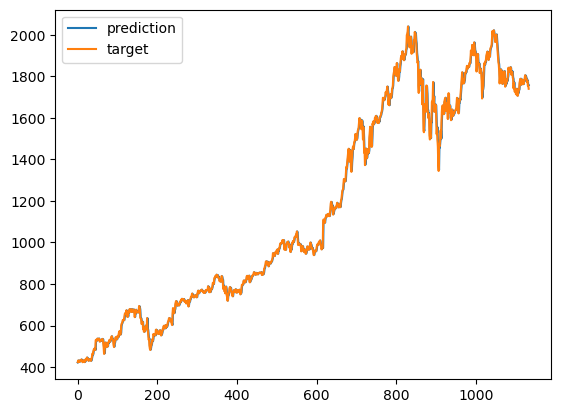

In [149]:
from matplotlib import pyplot as plt
##### Your Code Here ####

plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best')

plt.show()

## Problem2. Classification Model : Sentiment Analysis (NLP)
- Use amazon_cells_labelled.tsv data to solve your problem3

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 2-1 Load Data
- Load 'amazon_cells_labelled.tsv' and make pandas dataframe.
- Print the shape of the data.

In [152]:
### YOUR CODE HERE ###
amazon_review = pd.read_csv("amazon_cells_labelled.tsv", sep='\t')
########################

amazon_review.head()


,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### Problem 2-2 BOW (Bag Of Word)
- Finish your make_review_bow function.
- Make BOW using make_review_bow function.
- Make BOW_df using BOW you made.
    
*hint: Refer to Tutorial code below*

In [153]:
from sklearn.feature_extraction.text import CountVectorizer

In [154]:
#BOW Tutorial

example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print ('# Original text is \n', '\n'.join(example_doc))

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print ('# Word Vector\n', x)

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
bow_df

# Original text is 
 This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
   (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [155]:
"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Amazon review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    

### YOUR CODE HERE ###

  vectorizer = CountVectorizer(min_df=0)
  vectorizer.fit(data)
  x = vectorizer.transform(data)
  bow = x.toarray()

########################

  return vectorizer, bow


- Make BOW using make_review_bow function.
- Make BOW_df using BOW you made.

In [156]:

### YOUR CODE HERE ###

vectorizer, bow = make_review_bow(amazon_review['text'])
bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())

########################

print(bow_df.shape)
bow_df.head()

(1000, 1847)


,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Problem 2-3 Split Data : Train / Test
- Split your data (1000 reviews) __Train: 800 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__

*hint: refer to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split.*

In [157]:
from sklearn.model_selection import train_test_split


In [158]:
###YOUR CODE HERE###
X = bow_df
Y = amazon_review['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 144)

#######################

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1847), (200, 1847), (800,), (200,))

### Problem 2-4 Model by SGDClassifier
- Use SGDClassifer to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html*

In [159]:
from sklearn.linear_model import SGDClassifier

In [160]:
clf = SGDClassifier(max_iter=1000)
### YOUR CODE HERE ###

clf.fit(x_train, y_train)
test_pred = clf.predict(x_test)

########################

test_pred #prediction of x_test

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
sgdScore = accuracy_score(test_pred, y_test)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.795000


### Problem 2-5 Model by Multinomial Naive Bayes
- Use MultinomialNB to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html *

In [163]:
from sklearn.naive_bayes import MultinomialNB

In [164]:
NB=MultinomialNB()
### YOUR CODE HERE ###

NB.fit(x_train, y_train)
test_pred = NB.predict(x_test)
########################
test_pred # Prediction of x_test

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [165]:
nbScore = accuracy_score(test_pred,y_test)
print ("Model Accuracy: %f" % nbScore)

Model Accuracy: 0.845000


### Problem 3-6 Select the Best Model with 4 fold Cross Validation
- Split your data (1000 reviews) __Train: 800 (Validation: 200) / Test: 200__ randomly. 
    - X: bow_df of text(review) / Y: label(sentiment)[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__
- Train your model with different parameters using train data and check your model performance by cross validataion score.
- Choose your best model using cross validataion sets and report your test score.

*hint : refer to https://scikit-learn.org/1.0/modules/generated/sklearn.model_selection.cross_validate.html?highlight=cross_validate#sklearn.model_selection.cross_validate*

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

### 1) Split data

In [167]:

###YOUR CODE HERE###
X = bow_df
Y = amazon_review['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 144)

####################

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1847), (200, 1847), (800,), (200,))

### 2) Train model with different parameters using train data and check model performance by cross validataion score.

### Parameters 

### SGD classifer

* penalty : ['l2', 'l1', 'elasticnet']

* loss : ['epsilon_insensitive', 'modified_huber', 'squared_error', 'log_loss', 'hinge', 'squared_epsilon_insensitive', 'huber', 'squared_hinge', 'perceptron']

* alpha : [0.0001 * 3**float(i) for i in np.arange(-2,4)]

### MultinomialNB

* alpha : [1.0 * 3**float(i) for i in np.arange(-3,4)]

___

#### Initial Setting SGDClassifier Model Performance

In [168]:
SGDmodel = SGDClassifier(max_iter=1000)
### YOUR CODE HERE ###

SGDmodel.fit(x_train, y_train)
cv_results = cross_validate(SGDmodel, x_train, y_train, cv=4)
test_pred = SGDmodel.predict(x_test)

######################

test_score = accuracy_score(test_pred, y_test)
print("CV score : %.4f | test score : %.4f"%(cv_results['test_score'].mean(), test_score))

CV score : 0.7800 | test score : 0.7700


#### Train model with different parameters using train data

In [169]:
# penalty
from sklearn.model_selection import GridSearchCV
### YOUR CODE HERE ###
parameters = {'penalty':('l2', 'l1', 'elasticnet')}

SGDmodel = SGDClassifier(max_iter=1000)
clf = GridSearchCV(estimator = SGDmodel, param_grid = parameters, cv = 4)
clf.fit(x_train, y_train)

for i in range(3):
    print('case:   %10s | CV score:   %.4f'%(list(clf.cv_results_['params'][i].values())[0], clf.cv_results_['mean_test_score'][i]))
#######################

case:           l2 | CV score:   0.7988
case:           l1 | CV score:   0.7888
case:   elasticnet | CV score:   0.7863


In [170]:
# loss

### YOUR CODE HERE ###
parameters = {'loss':('epsilon_insensitive', 'modified_huber', 'squared_error', 'log_loss', 'hinge', 'squared_epsilon_insensitive', 'huber', 'squared_hinge', 'perceptron')}
SGDmodel = SGDClassifier(max_iter=1000)
clf = GridSearchCV(estimator = SGDmodel, param_grid = parameters, cv = 4)
clf.fit(x_train, y_train)

for i in range(9):
    print('case:   %30s | CV score:   %.4f'%(list(clf.cv_results_['params'][i].values())[0], clf.cv_results_['mean_test_score'][i]))
#######################

case:              epsilon_insensitive | CV score:   0.6812
case:                   modified_huber | CV score:   0.7925
case:                    squared_error | CV score:   0.4850
case:                         log_loss | CV score:   0.7900
case:                            hinge | CV score:   0.7900
case:      squared_epsilon_insensitive | CV score:   0.5038
case:                            huber | CV score:   0.7837
case:                    squared_hinge | CV score:   0.7900
case:                       perceptron | CV score:   0.7825


In [171]:
# alpha

### YOUR CODE HERE ###
parameters = {'alpha':(list(0.0001 * 3**float(i) for i in np.arange(-2,4)))}

SGDmodel = SGDClassifier(max_iter=1000)
clf = GridSearchCV(estimator = SGDmodel, param_grid = parameters, cv = 4)
clf.fit(x_train, y_train)

for i in range(6):
    print('case:   %30s | CV score:   %.4f'%(list(clf.cv_results_['params'][i].values())[0], clf.cv_results_['mean_test_score'][i]))
#######################


case:           1.1111111111111112e-05 | CV score:   0.7875
case:           3.3333333333333335e-05 | CV score:   0.7888
case:                           0.0001 | CV score:   0.7950
case:           0.00030000000000000003 | CV score:   0.8175
case:            0.0009000000000000001 | CV score:   0.8275
case:                           0.0027 | CV score:   0.8225


#### Best Setting SGDClassifier Model Performance

In [ ]:
### YOUR CODE HERE ###
SGDmodel = SGDClassifier(max_iter=1000)
parameters = {
    'penalty':('l2', 'l1', 'elasticnet'),
    'loss':('epsilon_insensitive', 'modified_huber', 'squared_error', 'log_loss', 'hinge', 'squared_epsilon_insensitive', 'huber', 'squared_hinge', 'perceptron'),
    'alpha':(list(0.0001 * 3**float(i) for i in np.arange(-2,4)))
}
clf = GridSearchCV(estimator = SGDmodel, param_grid = parameters, cv = 4)
clf.fit(x_train, y_train)

best_model = clf.best_estimator_
best_model.fit(x_train, y_train)
cv_results = cross_validate(best_model, x_train, y_train, cv=4)
test_pred = best_model.predict(x_test)
test_score = accuracy_score(test_pred, y_test)
SGDmodel = clf
#######################
print("CV score : %.4f | test score : %.4f"%(cv_results['test_score'].mean(), test_score))

In [ ]:
SGDmodel.best_params_

#### Initial Setting MultinomialNB Model Performance

In [172]:
### YOUR CODE HERE ###
NB=MultinomialNB()

NB.fit(x_train, y_train)
cv_results = cross_validate(NB, x_train, y_train, cv=4)
test_pred = NB.predict(x_test)
test_score = accuracy_score(test_pred, y_test)

#######################
print("CV score : %.4f | test score : %.4f"%(cv_results['test_score'].mean(), test_score))

CV score : 0.7975 | test score : 0.8450


#### Train model with different parameters using train data

In [173]:
# alpha

### YOUR CODE HERE ###
parameters = {'alpha':(list(1.0 * 3**float(i) for i in np.arange(-3,4)))}

NB=MultinomialNB()
clf = GridSearchCV(estimator = NB, param_grid = parameters, cv = 4)
clf.fit(x_train, y_train)

for i in range(6):
    print('case:   %30s | CV score:   %.4f'%(list(clf.cv_results_['params'][i].values())[0], clf.cv_results_['mean_test_score'][i]))

#######################

case:             0.037037037037037035 | CV score:   0.7913
case:               0.1111111111111111 | CV score:   0.7900
case:               0.3333333333333333 | CV score:   0.7937
case:                              1.0 | CV score:   0.7975
case:                              3.0 | CV score:   0.7838
case:                              9.0 | CV score:   0.7800


#### Best Setting MultinomialNB Model Performance

In [174]:
### YOUR CODE HERE ###
NB=clf.best_estimator_

NB.fit(x_train, y_train)
cv_results = cross_validate(NB, x_train, y_train, cv=4)
test_pred = NB.predict(x_test)
test_score = accuracy_score(test_pred, y_test)

#######################
print("CV score : %.4f | test score : %.4f"%(cv_results['test_score'].mean(), test_score))

CV score : 0.7975 | test score : 0.8450


### 3)choose your best model using cross validataion sets and report your test score.

In [209]:
### YOUR ANSWER HERE ###
# 더 나은 결과를 가진 모델 -> NB
NB=clf.best_estimator_
NB.fit(x_train, y_train)
cv_results = cross_validate(NB, x_train, y_train, cv=4)
test_pred = NB.predict(x_test)
test_score = accuracy_score(test_pred, y_test)

########################

print("CV score : %.4f"%cv_results['test_score'].mean())
print("Model Accuracy: %.4f"%test_score)

CV score : 0.7975
Model Accuracy: 0.8450


## Problem3. Clustering Model
- In this problem, you will cluster news article documents after converting them to TF-IDF vectors.
- All results may be different from the example results depending on your choice.

In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

### Problem 3-1 Pick 3 Categories you want and download

In [33]:
"""

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
 
"""
categories = ['comp.sys.mac.hardware','rec.sport.baseball', 'sci.med'] ## YOUR CODE HERE


In [34]:
dataset = fetch_20newsgroups(subset='test', categories=categories,
                             shuffle=True, random_state=45)
print("%s" % dataset.DESCR)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

### Problem 3-2 Convert the documents to a tf-idf matrix 
- refer to http://mlwiki.org/index.php/TF-IDF
- You can use sklearn.
- Set your own hyperparams.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

## YOUR CODE HERE

tfidf_vectorizer = TfidfVectorizer()

x = tfidf_vectorizer.fit_transform(dataset.data)
tfidf = x.toarray()

tfidf_matrix = pd.DataFrame(tfidf, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_matrix.head()

,00,000,000003,00000f,0000ahc,0001,000821,000iu,000mg,000ug,...,zot,zr8lv,zterm,zulu,zupcic,zygon,zyxel,zz,zzzzzz,ÿhooked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Problem 3-3 Cluster the documents using K-means
- You can use sklearn
- Set your own hyperparams

In [105]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

## YOUR CODE HERE

num_clusters = 3
km = KMeans(n_clusters = num_clusters, n_init = 10, max_iter = 500, random_state = 144)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

print(clusters[:10])

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[1, 2, 0, 1, 1, 0, 0, 1, 1, 0]


### Problem 3-4 Visualize document clusters
- You can use sklearn
- It may take a long time to compile

In [106]:
#USE THIS -DO NOT CHANGE-
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}
cluster_names = categories

D:\Anaconda\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


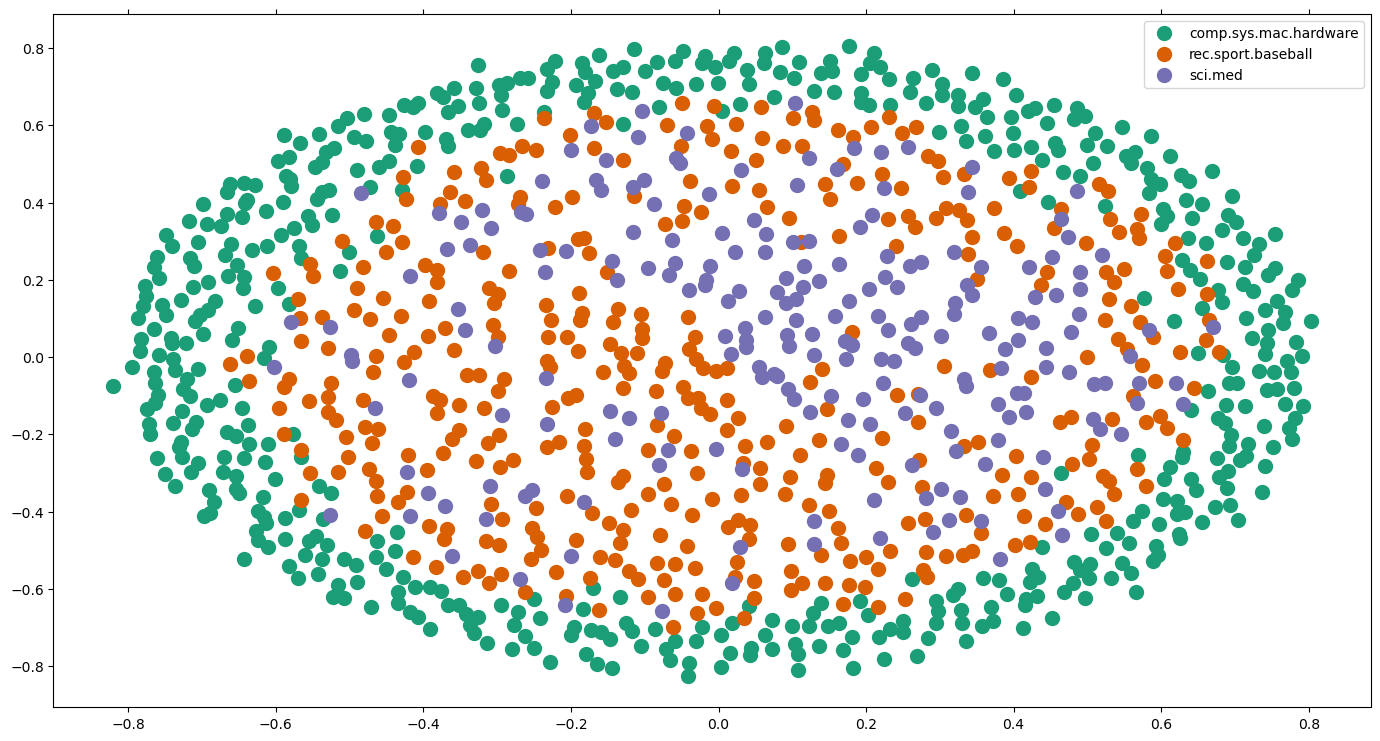

In [107]:
def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
    groups = df.groupby('label')
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, group in groups:
        ax.plot(\
            group['x'], 
            group['y'], 
            marker = 'o', 
            markersize = 10,
            linestyle = 'None', 
            label = cluster_names[name], 
            color = cluster_colors[name]) ## YOUR CODE HERE. (Complete the function call.)
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors)